# Stock Index Covariance

I've done the code, I'll make some more notes and explainations later.

For now, just look at the nice heatmaps at the bottom!

In [135]:
from datetime import datetime
from pandas_datareader.stooq import StooqDailyReader
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

start = datetime(2020, 1, 1)
end = datetime(2023, 4, 4)

# nasdaq100 = StooqDailyReader("^NDX", start, end).read() # Nasdaq 100
# sp500 =StooqDailyReader("^SPX", start, end).read() # S&P 500
# dow = StooqDailyReader("^DJI", start, end).read() # Dow Jones
# ftse100 = StooqDailyReader("^FTSE100", start, end).read() # UK
# nikkei225 = StooqDailyReader("^N225", start, end).read() # Japan
# cac = StooqDailyReader("^FCHI", start, end).read() # France
# dax = StooqDailyReader("^GDAXI", start, end).read() # Germany
# aord = StooqDailyReader("^AXJO", start, end).read() # Australia
# hsi = StooqDailyReader("^HSI", start, end).read() # Hong Kong
# hangseng = StooqDailyReader("^HSCE", start, end).read() # China
# bse = StooqDailyReader("^BSESN", start, end).read() # India
# nifty = StooqDailyReader("^NSEI", start, end).read() # India
# ibov = StooqDailyReader("^BVSP", start, end).read() # Brazil

# # print the head of each dataframe
# print(nasdaq100.head())
# print(sp500.head())
# print(dow.head())
# print(ftse100.head())
# print(nikkei225.head())
# print(cac.head())
# print(dax.head())
# print(aord.head())
# print(hsi.head())
# print(hangseng.head())
# print(bse.head())
# print(nifty.head())
# print(ibov.head())

### A note on the cell above:

Using `StooqDailyReader` worked on US indexes, but not on any of the other ones!

In [136]:
ftse=pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/^ftse?period1=1058907192&period2=9999999999&interval=1d&filter=history&frequency=1d',index_col=[0],parse_dates=True)
print(ftse.head())

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2003-07-22  4044.300049  4079.800049  4043.500000  4079.800049  4079.800049   
2003-07-23  4079.699951  4115.200195  4077.899902  4086.500000  4086.500000   
2003-07-24  4086.500000  4155.200195  4086.500000  4149.600098  4149.600098   
2003-07-25  4149.600098  4149.600098  4116.299805  4131.200195  4131.200195   
2003-07-28  4131.200195  4183.000000  4131.200195  4148.799805  4148.799805   

                  Volume  
Date                      
2003-07-22  1.811406e+09  
2003-07-23  1.772697e+09  
2003-07-24  1.873261e+09  
2003-07-25  1.417653e+09  
2003-07-28  1.306519e+09  


In [137]:
# create a function to convert datetime to unix timestamp
def to_unixtime(dt):
    epoch = datetime.utcfromtimestamp(0)
    return int((dt - epoch).total_seconds())

nasdaq_query_url = 'https://query1.finance.yahoo.com/v7/finance/download/^ndx?period1={}&period2={}'.format(to_unixtime(start), to_unixtime(end))
nasdaq = pd.read_csv(nasdaq_query_url, index_col=[0],parse_dates=False)

dow_query_url = 'https://query1.finance.yahoo.com/v7/finance/download/^dji?period1={}&period2={}'.format(to_unixtime(start), to_unixtime(end))
dow = pd.read_csv(dow_query_url, index_col=[0],parse_dates=False)

sp500_query_url = 'https://query1.finance.yahoo.com/v7/finance/download/^gspc?period1={}&period2={}'.format(to_unixtime(start), to_unixtime(end))
sp500 = pd.read_csv(sp500_query_url, index_col=[0],parse_dates=False)

ftse_query_url = 'https://query1.finance.yahoo.com/v7/finance/download/^ftse?period1={}&period2={}'.format(to_unixtime(start), to_unixtime(end))
ftse=pd.read_csv(ftse_query_url, index_col=[0],parse_dates=False)

cac_query_url = 'https://query1.finance.yahoo.com/v7/finance/download/^fchi?period1={}&period2={}'.format(to_unixtime(start), to_unixtime(end))
cac = pd.read_csv(cac_query_url, index_col=[0],parse_dates=False)

dax_query_url = 'https://query1.finance.yahoo.com/v7/finance/download/^gdaxi?period1={}&period2={}'.format(to_unixtime(start), to_unixtime(end))
dax = pd.read_csv(dax_query_url, index_col=[0],parse_dates=False)

nikkei_query_url = 'https://query1.finance.yahoo.com/v7/finance/download/^n225?period1={}&period2={}'.format(to_unixtime(start), to_unixtime(end))
nikkei = pd.read_csv(nikkei_query_url, index_col=[0],parse_dates=False)

aord_query_url = 'https://query1.finance.yahoo.com/v7/finance/download/^axjo?period1={}&period2={}'.format(to_unixtime(start), to_unixtime(end))
aord = pd.read_csv(aord_query_url, index_col=[0],parse_dates=False)

hsi_query_url = 'https://query1.finance.yahoo.com/v7/finance/download/^hsi?period1={}&period2={}'.format(to_unixtime(start), to_unixtime(end))
hsi = pd.read_csv(hsi_query_url, index_col=[0],parse_dates=False)

nifty_query_url = 'https://query1.finance.yahoo.com/v7/finance/download/^nsei?period1={}&period2={}'.format(to_unixtime(start), to_unixtime(end))
nifty = pd.read_csv(nifty_query_url, index_col=[0],parse_dates=False)

ibov_query_url = 'https://query1.finance.yahoo.com/v7/finance/download/^bvsp?period1={}&period2={}'.format(to_unixtime(start), to_unixtime(end))
ibov = pd.read_csv(ibov_query_url, index_col=[0],parse_dates=False)

tase_query_url = 'https://query1.finance.yahoo.com/v7/finance/download/TASE.TA?period1={}&period2={}'.format(to_unixtime(start), to_unixtime(end))
tase = pd.read_csv(tase_query_url, index_col=[0],parse_dates=False)


In [138]:
df = pd.DataFrame()

try:
    df['nasdaq'] = nasdaq['Close']
    df['dow'] = dow['Close']
    df['sp500'] = sp500['Close']
    df['ftse'] = ftse['Close']
    df['cac'] = cac['Close']
    df['dax'] = dax['Close']
    df['nikkei'] = nikkei['Close']
    df['aord'] = aord['Close']
    df['hsi'] = hsi['Close']
    df['nifty'] = nifty['Close']
    df['ibov'] = ibov['Close']
    df['tase'] = tase['Close']
    
except:
    pass

print(df.head())

                 nasdaq           dow        sp500         ftse          cac  \
Date                                                                           
2020-01-02  8872.219727  28868.800781  3257.850098  7604.299805  6041.500000   
2020-01-03  8793.900391  28634.880859  3234.850098  7622.399902  6044.160156   
2020-01-06  8848.519531  28703.380859  3246.280029  7575.299805  6013.589844   
2020-01-07  8846.450195  28583.679688  3237.179932  7573.899902  6012.350098   
2020-01-08  8912.370117  28745.089844  3253.050049  7574.899902  6031.000000   

                     dax        nikkei         aord           hsi  \
Date                                                                
2020-01-02  13385.929688           NaN  6690.600098  28543.519531   
2020-01-03  13219.139648           NaN  6733.500000  28451.500000   
2020-01-06  13126.990234  23204.859375  6735.700195  28226.189453   
2020-01-07  13226.830078  23575.720703  6826.399902  28322.060547   
2020-01-08  13320.179688 

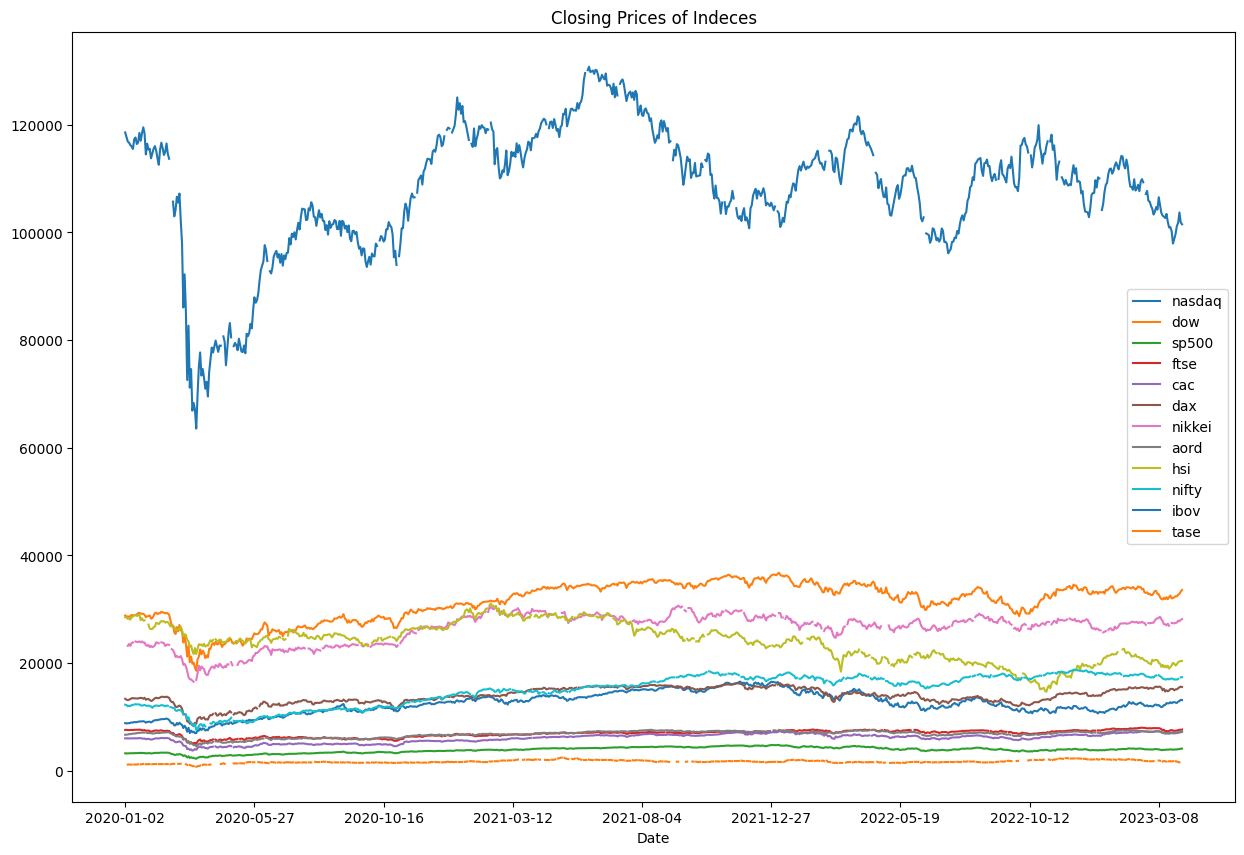

In [139]:
# plot closing prices of indeces over time in line graph
df.plot(figsize=(15, 10), title='Closing Prices of Indeces')
plt.show()

In [140]:
# calculate monhtly returns of indeces
monthly_returns = df.pct_change(21)
monthly_returns = monthly_returns.dropna()
print(monthly_returns.head())


              nasdaq       dow     sp500      ftse       cac       dax  \
Date                                                                     
2020-02-05  0.058649  0.020467  0.027234 -0.012250 -0.004688  0.026765   
2020-02-06  0.067764  0.027851  0.033548 -0.009123  0.004296  0.026309   
2020-02-07  0.054837  0.012434  0.022951 -0.014284 -0.000207  0.014537   
2020-02-10  0.058646  0.011048  0.023633 -0.019900 -0.004448 -0.000076   
2020-02-11  0.061475  0.015701  0.028297 -0.011663  0.002924  0.010719   

              nikkei      aord       hsi     nifty      ibov      tase  
Date                                                                    
2020-02-05  0.004943  0.035690 -0.050997  0.008013 -0.007273  0.109091  
2020-02-06  0.012635  0.032638 -0.029248  0.007052 -0.012618  0.079526  
2020-02-07  0.026857  0.030069 -0.024340  0.006071 -0.021308  0.092466  
2020-02-10 -0.002270  0.020119 -0.046205 -0.015095 -0.029125  0.082902  
2020-02-11 -0.006901  0.018228 -0.036815 -0

In [141]:
# Find the expected returns 
expected_returns = monthly_returns.mean()
print(expected_returns)

nasdaq    0.011392
dow       0.005197
sp500     0.007166
ftse      0.001899
cac       0.007409
dax       0.006353
nikkei    0.006161
aord      0.002287
hsi      -0.006624
nifty     0.011634
ibov      0.000570
tase      0.015964
dtype: float64


In [145]:
# find the covariance of monthly returns
cov_matrix = monthly_returns.cov()

# find the correlation of monthly returns
corr_matrix = monthly_returns.corr()

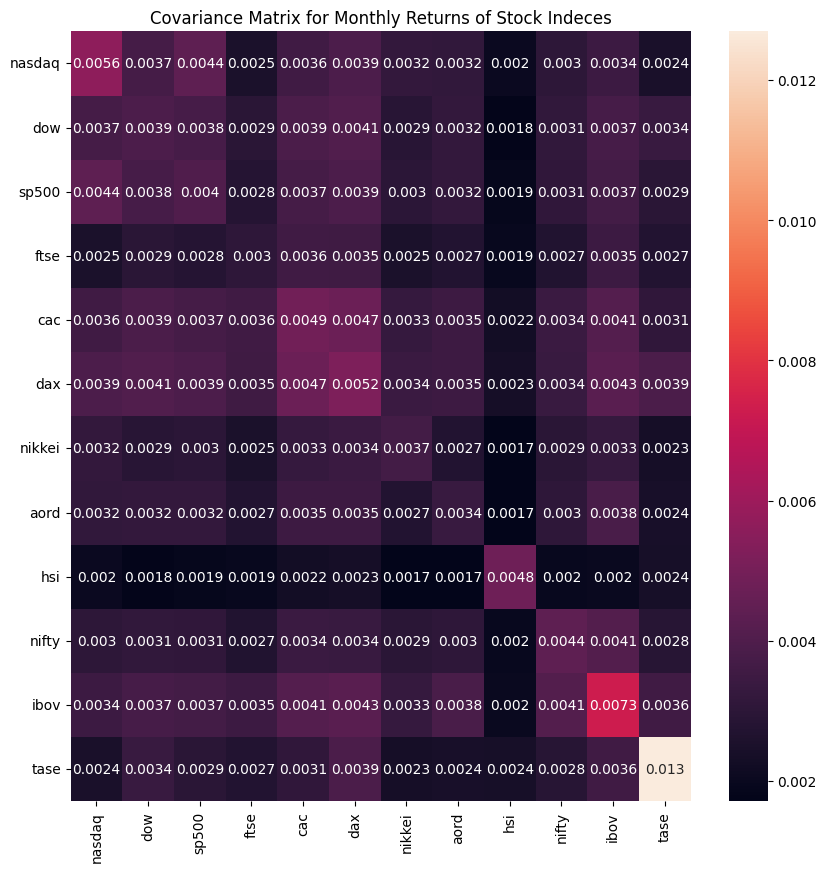

In [148]:
# create a heatmap of the covariance matrix using seaborn
import seaborn as sns
sns.heatmap(cov_matrix, annot=True)
# increase size of heatmap
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.title('Covariance Matrix for Monthly Returns of Stock Indeces')
plt.show()

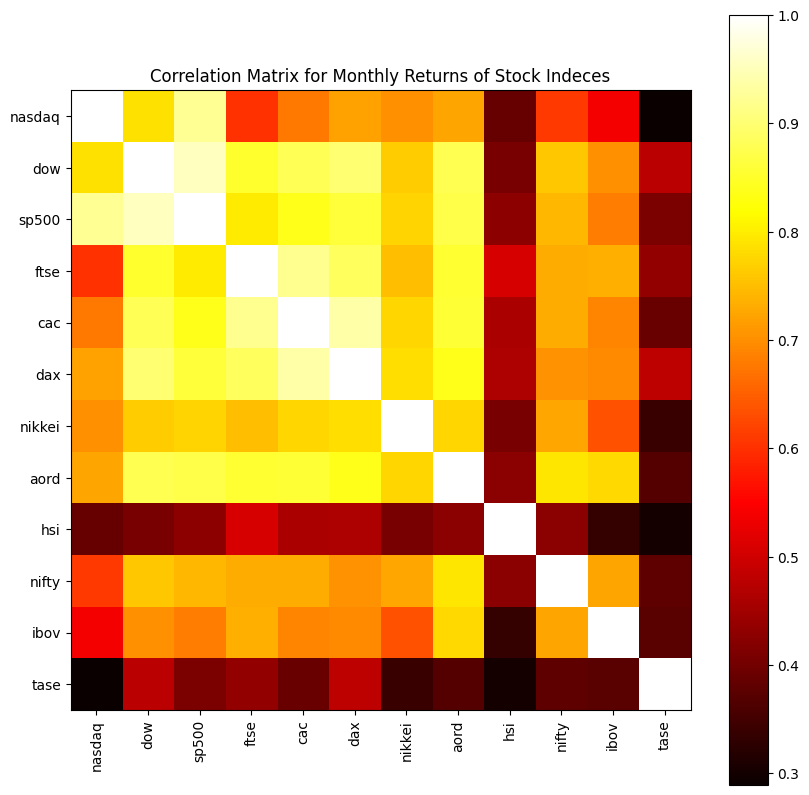

In [150]:
# create a heatmap of the correlation matrix
plt.figure(figsize=(10, 10))
plt.imshow(corr_matrix, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Matrix for Monthly Returns of Stock Indeces')
plt.show()

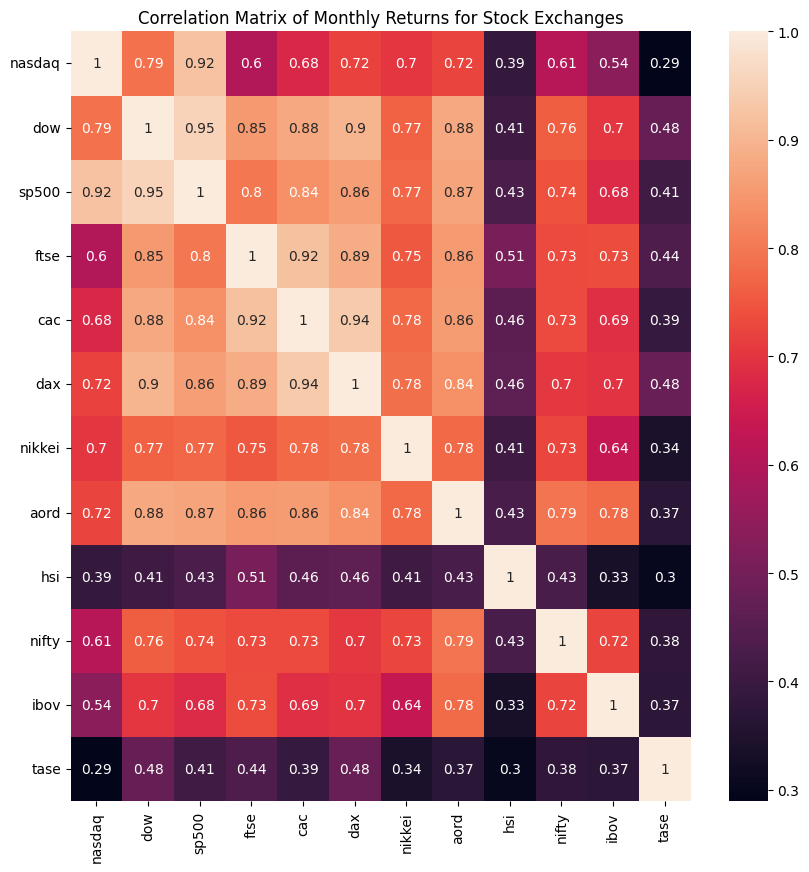

In [147]:
# create a heatmap of the covariance matrix using seaborn
sns.heatmap(corr_matrix, annot=True)
# increase size of heatmap
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.title('Correlation Matrix of Monthly Returns for Stock Exchanges')
plt.show()

### Observations

It was interesting to see that the Hang Seng index and the Tel Aviv Stock Exchange didn't correlate very highly with any of the other stock indexes around the world!

What was also interesting to see (although, not surprising) was that all western indexes, including Australia's ASX correlated with eachother.

What was interesting *and* a surprise was that the ASX correlated closely with the Indian stock exchanges, roughly the same as the Nikkei, and even more than it does with the Hang Seng index.

In [159]:
import yfinance as yf

symbol = yf.Ticker("AAPL")
print(symbol.info)

# get PE ratio
pe = symbol.info['trailingPE']
print(pe)

# get earnings per share for AAPL
eps = symbol.info['epsTrailingTwelveMonths']
print(eps)


{'symbol': 'AAPL', 'dividendDate': 1676505600, 'twoHundredDayAverageChangePercent': 0.10031721, 'averageAnalystRating': '2.0 - Buy', 'fiftyTwoWeekLowChangePercent': 0.31883705, 'language': 'en-US', 'regularMarketDayRange': '161.8 - 165.05', 'earningsTimestampEnd': 1682942400, 'epsForward': 6.59, 'regularMarketDayHigh': 165.05, 'twoHundredDayAverageChange': 14.930191, 'twoHundredDayAverage': 148.8298, 'askSize': 22, 'bookValue': 3.581, 'marketCap': 2590994333696, 'fiftyTwoWeekHighChange': -12.389999, 'fiftyTwoWeekRange': '124.17 - 176.15', 'fiftyDayAverageChange': 11.240799, 'averageDailyVolume3Month': 67080152, 'exchangeDataDelayedBy': 0, 'firstTradeDateMilliseconds': 345479400000, 'trailingAnnualDividendRate': 0.91, 'fiftyTwoWeekLow': 124.17, 'regularMarketVolume': 50263014, 'market': 'us_market', 'postMarketPrice': 163.39, 'quoteSourceName': 'Nasdaq Real Time Price', 'messageBoardId': 'finmb_24937', 'priceHint': 2, 'regularMarketDayLow': 161.8, 'sourceInterval': 15, 'exchange': 'NMS'